Nama : Gymnastiar Al Khoarizmy <br>
NIM : 122450096
### Tugas VDI 3 (Data Visualitation Methodologi & Define Purpose and parameters)

1. Tentukan data yang akan anda gunakan dalam visualisasi
2. Berdasarkan data yang anda pilih tentukan tujuan, user, fungsi dan tone (jika ada) yang sesuai dengan visualisasi yang akan anda buat
3. Buatlah visualisasi dengan mengunakan library python seperti matplotlib, seaborn atau tools lain

In [2]:
# meng import library yang diperlukan
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

1. Dataset yang saya gunakan pada tugas ini ialah AI/ML Salaries dari kaggle yang memiliki koleksi data informasi gaji dari pekerja di seluruh dunia dalam bidang AI/ML dan Big Data.

In [20]:
# melakukan import dataset
df = pd.read_csv('/content/salaries.csv')
# menampilkan informasi umum dataset
print(df.head(5))
print(df.info())
df.drop_duplicates(inplace=True)

   work_year experience_level employment_type           job_title  salary  \
0       2024               MI              FT  Analytics Engineer   77500   
1       2024               SE              FT        AI Developer  252000   
2       2024               SE              FT        AI Developer  168000   
3       2024               MI              FT      Data Scientist  199500   
4       2024               MI              FT      Data Scientist   86700   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             CAD          59615                 CA           100   
1             USD         252000                 US             0   
2             USD         168000                 US             0   
3             USD         199500                 US           100   
4             USD          86700                 US           100   

  company_location company_size  
0               CA            S  
1               US            M  
2               US  

In [23]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

2. Menentukan tujuan, user, fungsi dan tone sesuai dengan visualisasi yang akan dibuat <br>
**Tujuan**: Tujuan dari projek tugas ini yaitu untuk menganalisa dataset trend global upah pekerjaan AI/ML antara 2020 sampai 2024 melalui explanatory data analysis yaitu dengan visualisasi data. Analisis ini ditujukan dengan maksud untuk memenuhi tugas pertemuan 3 VDI. Kemudian melihat dari bentuk datasetnya, grafik yang mungkin dapat ditampilkan yaitu histogram distribusi jumlah pekerja tiap tahun, barchart distribusi jenis pekerjaan, dan barchart distribusi jumlah pekerja berdasarkan negaranya. <br>
**User**: Target dari visualisasi projek tugas ini yaitu Boardroom Environment, dimana hanya diperlukan visualisasi dari data secara umum untuk semua fitur data dan tidak begitu spesifik. Namun memungkinkan untuk user One to One Exchange apabila diadakan analisis terkait suatu fitur lebih lanjut. <br>
**Fungsi**: Fungsi dari projek kali ini yaitu Provide an interface to data in order to facilitate visual exploration. Dimana fungsi utama visualisasi ini sebagai penyedia informasi antarmuka untuk menjelajahi data lebih lengkap secara visual. Contohnya seperti visualisasi korelasi antar fitur. <br>
**Tone**: Tone dari visualisasi yang digunakan pada projek ini yaitu Pragmatic or analytical potrayal. Dimana nantinya akan ditampilkan plot histrogram bar chart dan line chart untuk membantu memahami penggambaran dataset yang cepat, efisien, dan tepat dengan target audiens ialah pembaca yang ingin memahami data bukan untuk melihat estetikanya.


3. Buatlah visualisasi dengan mengunakan library python seperti matplotlib, seaborn atau tools lain

#### Mengecek outlier dengan boxplot

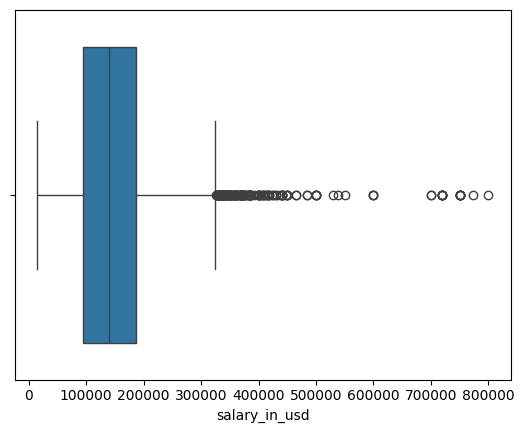

In [26]:
sns.boxplot(x=df['salary_in_usd'])
plt.show()

In [28]:
# menghapus outlier
high_salary_df = df[df['salary_in_usd'] > 650000]

df_salaries_filtered = df[df['salary_in_usd'] <= 650000]

print(df_salaries_filtered.shape)

(10658, 11)


#### Histogram Distribusi Pekerja

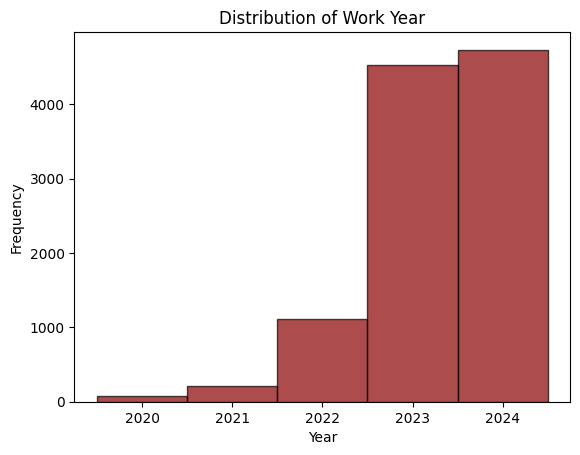

In [35]:
bins = [2019.5, 2020.5, 2021.5, 2022.5, 2023.5, 2024.5]

# Plot histogram
plt.hist(df_salaries_filtered['work_year'], bins=bins, color='darkred', alpha=0.7, edgecolor='black')
plt.xticks([2020, 2021, 2022, 2023, 2024])

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Work Year')

plt.show()

Histogram jumlah pekerja tiap tahun menunjukkan bahwa sebagian besar titik data terkonsentrasi di sekitar tahun-tahun terkini, khususnya 2023 dan 2024. Terdapat kekurangan representasi yang nyata dari tahun-tahun sebelumnya, khususnya 2020 dan 2021. Distribusi yang tidak merata ini dapat menyulitkan untuk membandingkan tren dari waktu ke waktu, karena sebagian besar data condong ke tahun-tahun berikutnya. Konsentrasi dalam beberapa tahun terakhir menunjukkan bahwa kumpulan data tersebut mungkin terutama mencerminkan tren ketenagakerjaan terkini, dengan wawasan yang lebih sedikit tentang periode sebelumnya.

#### Barchart distribusi jenis pekerjaan

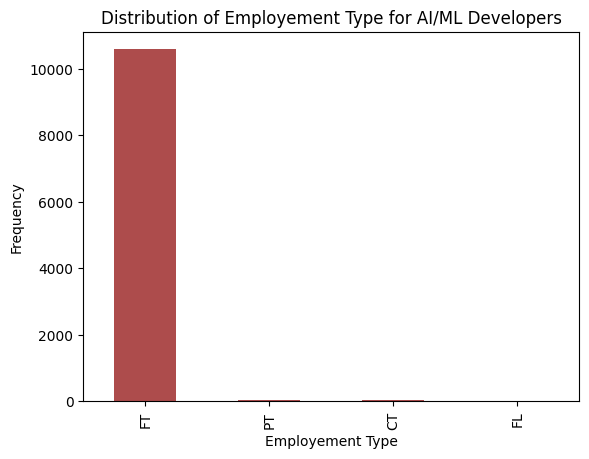

In [36]:
employment_type_counts = df_salaries_filtered['employment_type'].value_counts()

employment_type_counts.plot(kind='bar', color='darkred', alpha=0.7)
plt.xlabel('Employement Type')
plt.ylabel('Frequency')
plt.title('Distribution of Employement Type for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

Distribusi jenis pekerjaan dalam dataset sangat condong ke posisi penuh waktu. Dengan lebih dari 10.000 data, peran penuh waktu mendominasi kumpulan data, sehingga sulit untuk membedakan distribusi jenis pekerjaan lain, seperti posisi paruh waktu, kontrak, dan lepas. Representasi pekerjaan penuh waktu yang sangat banyak ini dapat menimbulkan bias dalam analisis, yang berpotensi menutupi tren dan wawasan yang terkait dengan bentuk pekerjaan lain. Kurangnya representasi peran paruh waktu, kontrak, dan lepas menunjukkan bahwa kumpulan data mungkin tidak sepenuhnya menangkap keragaman pengaturan pekerjaan dalam industri, yang membatasi penerapan temuan pada skenario kerja non-penuh waktu.

#### Barchart lokasi perusahaan berdasarkan negara

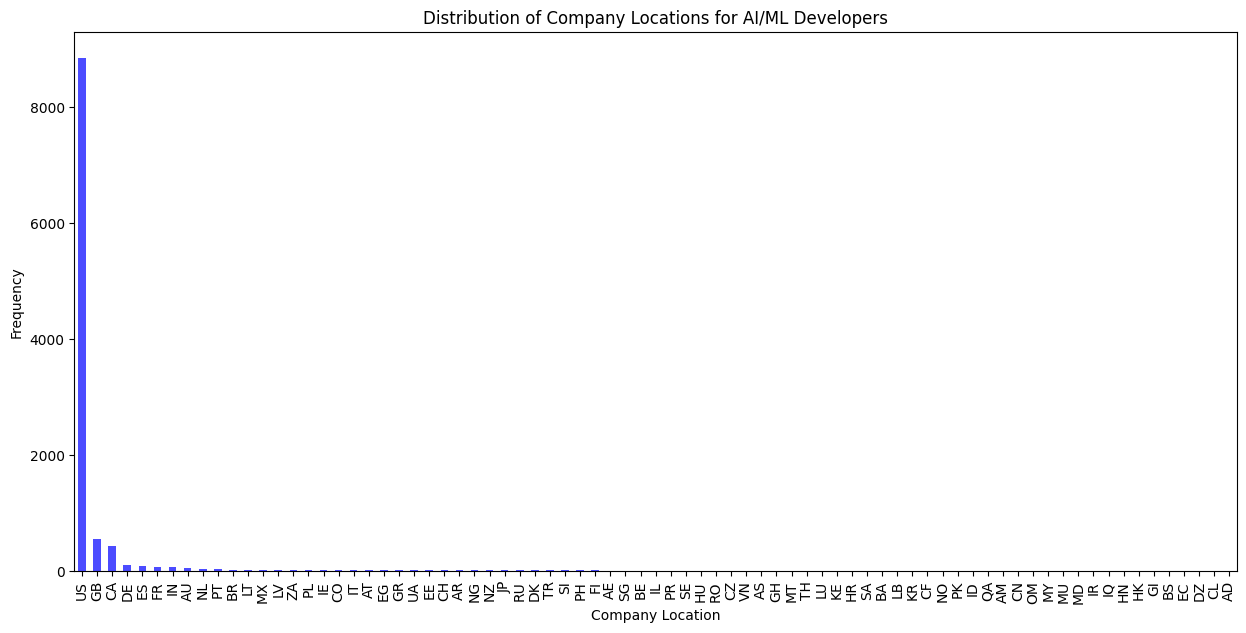

In [37]:
# hitung tiap negara
company_location_counts = df_salaries_filtered['company_location'].value_counts()

plt.figure(figsize=(15, 7))
company_location_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Company Location')
plt.ylabel('Frequency')
plt.title('Distribution of Company Locations for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

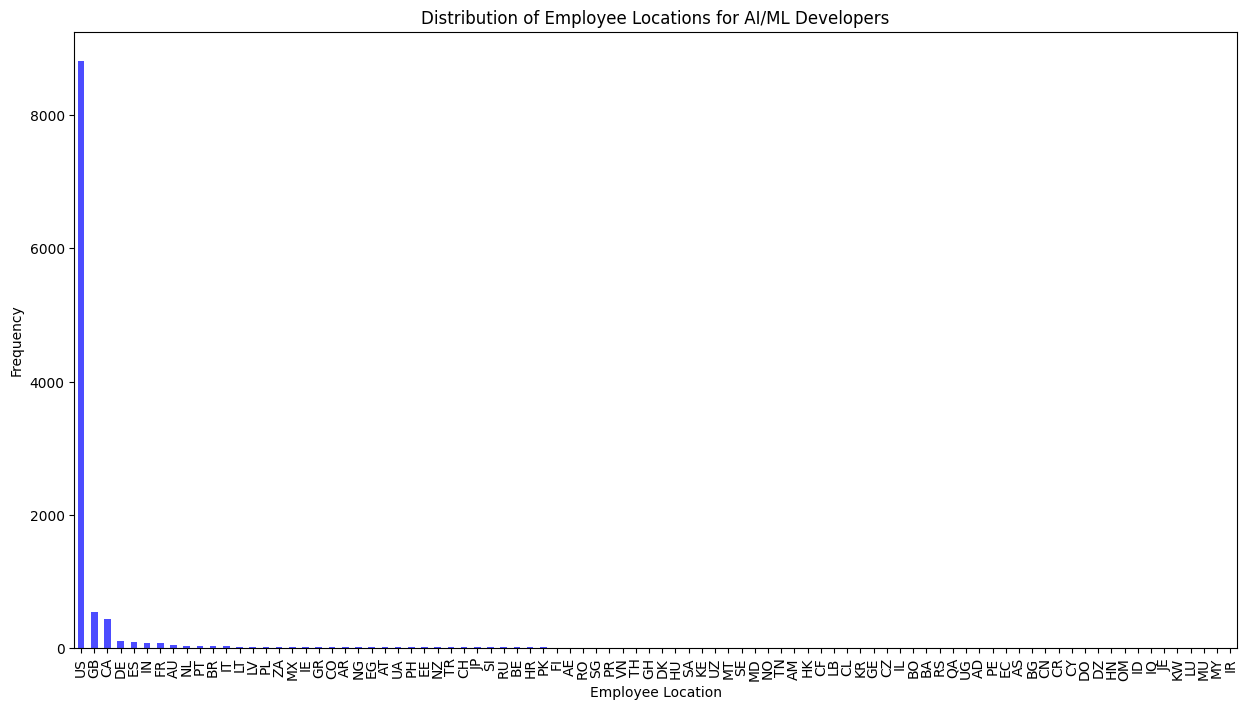

In [38]:
# menghitung pekerja tiap negara
employee_residence_counts = df_salaries_filtered['employee_residence'].value_counts()

plt.figure(figsize=(15, 8))
employee_residence_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Employee Location')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Locations for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

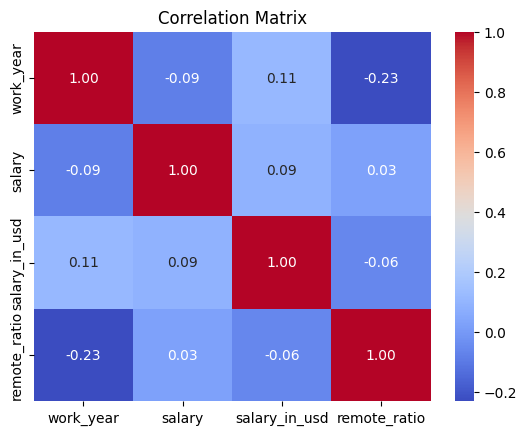

In [41]:
# Select only numerical features for correlation analysis
numerical_df = df_salaries_filtered.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Analisis korelasi menunjukkan hubungan yang lemah antara tiap variabel salah satunya salary dan salary_in_usd. Terdapat korelasi positif moderat antara work_year dan salary_in_usd, yang menunjukkan bahwa gaji cenderung meningkat seiring bertambahnya pengalaman. remote_ratio memiliki korelasi yang dapat diabaikan dengan variabel lain, menunjukkan bahwa hal itu tidak secara signifikan memengaruhi gaji atau tahun kerja dalam dataset ini.